In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras

In [ ]:
import librosa
import librosa.display
from IPython.display import Audio

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/music genre classification/features_3_sec.csv')

In [ ]:
df.shape

(9990, 60)

In [ ]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
df = df.drop(labels ='filename',axis=1)

In [ ]:
audio_recording = '/content/drive/MyDrive/music genre classification/genres_original/rock/rock.00015.wav'
data, sr  = librosa.load(audio_recording)

In [ ]:
librosa.load(audio_recording, sr=45600)

(array([0.01111925, 0.0185342 , 0.02275005, ..., 0.03226656, 0.02517847,
        0.01191811], dtype=float32),
 45600)

In [ ]:
import IPython
IPython.display.Audio(data, rate = sr)

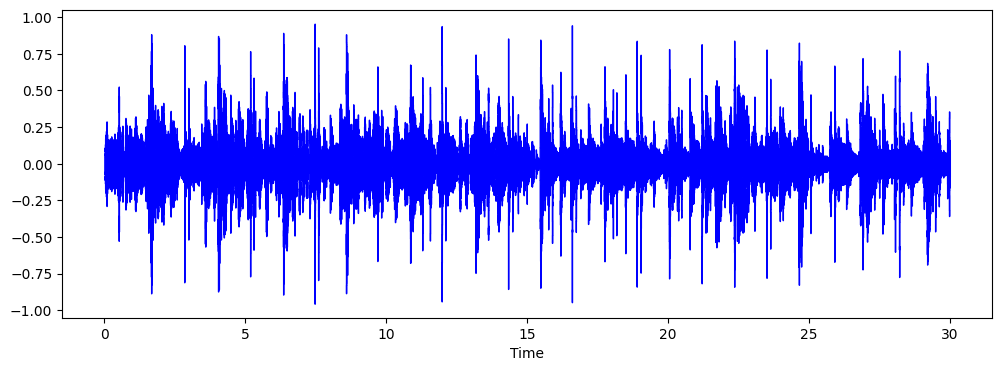

In [ ]:
plt.figure(figsize = (12,4))
librosa.display.waveshow(data, color = 'blue')
plt.show()

In [ ]:
class_labels = df.iloc[:,-1]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(class_labels)

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(np.array(df.iloc[:,:-1], dtype = float))

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)

In [ ]:
a = len(train_y)
b = len(test_y)
a, b

(7992, 1998)

In [ ]:
from keras.models import Sequential
from tensorflow.keras import layers, models

In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape = (train_x.shape[1],)),
    layers.Dropout(0.2),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')  # 10 output classes for 10 genres
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y,
                    epochs = 600, batch_size = 128, validation_data = (test_x,test_y))

Epoch 1/600
63/63 [==============================] - 8s 9ms/step - loss: 1.5963 - accuracy: 0.4245 - val_loss: 1.0872 - val_accuracy: 0.6366
Epoch 2/600
63/63 [==============================] - 0s 6ms/step - loss: 1.0823 - accuracy: 0.6241 - val_loss: 0.7880 - val_accuracy: 0.7387
Epoch 3/600
63/63 [==============================] - 0s 7ms/step - loss: 0.8749 - accuracy: 0.7056 - val_loss: 0.6676 - val_accuracy: 0.7748
Epoch 4/600
63/63 [==============================] - 1s 9ms/step - loss: 0.7544 - accuracy: 0.7461 - val_loss: 0.6082 - val_accuracy: 0.7913
Epoch 5/600
63/63 [==============================] - 1s 8ms/step - loss: 0.6595 - accuracy: 0.7787 - val_loss: 0.5453 - val_accuracy: 0.8148
Epoch 6/600
63/63 [==============================] - 1s 9ms/step - loss: 0.5870 - accuracy: 0.8062 - val_loss: 0.5006 - val_accuracy: 0.8288
Epoch 7/600
63/63 [==============================] - 1s 9ms/step - loss: 0.5047 - accuracy: 0.8268 - val_loss: 0.4624 - val_accuracy: 0.8413
Epoch 8/600
6

In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y, batch_size = 128)
test_loss, test_acc

16/16 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.9369


(0.5168182253837585, 0.9369369149208069)